<a href="https://colab.research.google.com/github/Ruthuvikas/Stress-tweet-detection/blob/main/Stress_tweet_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -o /content/drive/MyDrive/Xdata/archive.zip

Archive:  /content/drive/MyDrive/Xdata/archive.zip
  inflating: Reddit_Combi.csv        
  inflating: Reddit_Title.csv        
  inflating: Twitter_ Non-Advert-Tabelle 1.csv  
  inflating: Twitter_Full.csv        


In [2]:
import pandas as pd

USECOLS = ['text', 'labels']
df = pd.read_csv(filepath_or_buffer='Twitter_Full.csv', sep=';', usecols=USECOLS)
df.head()


,text,labels
0,Being s mom is cleaning 24/7 the same shit ove...,1
1,And now we have been given the walkthru book b...,0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0
3,speak-no-evil monkey Can I Be Honest With You...,1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0


In [3]:
df.columns

Index(['text', 'labels'], dtype='object')

In [4]:
df

,text,labels
0,Being s mom is cleaning 24/7 the same shit ove...,1
1,And now we have been given the walkthru book b...,0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0
3,speak-no-evil monkey Can I Be Honest With You...,1
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0
...,...,...
8895,Thank you for all your business questions toda...,0
8896,Who is planning on walking their minds today?!...,1
8897,no mobile phones Three Tips to Reduce Technos...,1
8898,purple heart Day 1 purple heart But vets firs...,1


In [5]:
df['text'][0]

'Being s mom is cleaning 24/7 the same shit over and over with the end result with everything being a mess again. momlife kids tired'

In [6]:
df['text'].fillna("", inplace=True)

In [7]:
import pandas as pd
import tensorflow_hub as hub
from tqdm import tqdm

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to convert tweets to vectors
def tweet_to_vector(tweet):
    return embed([tweet])[0].numpy()

# Convert each tweet to a vector and store the result
vectors = []
for tweet in tqdm(df['text'], desc="Converting tweets to vectors"):
    vector = tweet_to_vector(tweet)
    vectors.append(vector)

# Option 1: Store vectors in a new DataFrame column
df['tweet_vectors'] = vectors



Converting tweets to vectors: 100%|██████████| 8900/8900 [01:03<00:00, 140.94it/s]


In [8]:
df['tweet_vectors']

0       [0.05283811, -0.08590957, 0.04215441, 0.017693...
1       [-0.0037022003, 0.0072014355, -0.02259598, 0.0...
2       [0.08475753, -0.07600954, -0.042283405, 0.0377...
3       [0.024447342, -0.05977322, -0.050316926, -0.02...
4       [-0.002654642, -0.07114219, -0.047089737, -0.0...
                              ...                        
8895    [-0.04786226, 0.0075260308, -0.012790812, -0.0...
8896    [-0.0267528, 0.00047889937, 0.039825298, -0.03...
8897    [-0.054867502, 0.004924008, 0.023037918, -0.04...
8898    [-0.05440314, -0.057027712, 0.017296702, -0.01...
8899    [0.056354567, 0.038590323, 0.022392513, -0.006...
Name: tweet_vectors, Length: 8900, dtype: object

In [9]:
df.head()

,text,labels,tweet_vectors
0,Being s mom is cleaning 24/7 the same shit ove...,1,"[0.05283811, -0.08590957, 0.04215441, 0.017693..."
1,And now we have been given the walkthru book b...,0,"[-0.0037022003, 0.0072014355, -0.02259598, 0.0..."
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,0,"[0.08475753, -0.07600954, -0.042283405, 0.0377..."
3,speak-no-evil monkey Can I Be Honest With You...,1,"[0.024447342, -0.05977322, -0.050316926, -0.02..."
4,Psy Do u hv any regrets? Me No Psy Are you hap...,0,"[-0.002654642, -0.07114219, -0.047089737, -0.0..."


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df['tweet_vectors'].tolist())
y = df['labels']

X = X.values
y = y.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

RandomForestClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=200, random_state=30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8301860910137983

SVM

In [12]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')


0.8291765966286898

Neural network

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [14]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (1 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (2 classes of iris flowers)
  def __init__(self, in_features= 512, h1=8, h2=9, out_features=2):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [15]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [18]:
X_train

tensor([[-0.0582, -0.0516,  0.0523,  ..., -0.0465,  0.0331, -0.0035],
        [-0.0151,  0.0070,  0.0439,  ...,  0.0823, -0.0191, -0.0074],
        [ 0.0244, -0.0848, -0.0391,  ...,  0.0298, -0.0671,  0.0538],
        ...,
        [ 0.0489, -0.0608,  0.0482,  ...,  0.0440, -0.0614, -0.0546],
        [-0.0485, -0.0904,  0.0370,  ...,  0.0044, -0.0362, -0.0143],
        [ 0.0463,  0.0274,  0.0566,  ...,  0.0334,  0.0824,  0.0138]])

In [19]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 500
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.7138317823410034
Epoch: 10 and loss: 0.7009371519088745
Epoch: 20 and loss: 0.6858659982681274
Epoch: 30 and loss: 0.6686360836029053
Epoch: 40 and loss: 0.6507354974746704
Epoch: 50 and loss: 0.6316615343093872
Epoch: 60 and loss: 0.6107435822486877
Epoch: 70 and loss: 0.5881182551383972
Epoch: 80 and loss: 0.5641581416130066
Epoch: 90 and loss: 0.5395877361297607
Epoch: 100 and loss: 0.5153663754463196
Epoch: 110 and loss: 0.49245214462280273
Epoch: 120 and loss: 0.4716412127017975
Epoch: 130 and loss: 0.45343396067619324
Epoch: 140 and loss: 0.4379560053348541
Epoch: 150 and loss: 0.42509347200393677
Epoch: 160 and loss: 0.4145769774913788
Epoch: 170 and loss: 0.4060104191303253
Epoch: 180 and loss: 0.3990350067615509
Epoch: 190 and loss: 0.3933252990245819
Epoch: 200 and loss: 0.38862404227256775
Epoch: 210 and loss: 0.38467612862586975
Epoch: 220 and loss: 0.3812975585460663
Epoch: 230 and loss: 0.37839043140411377
Epoch: 240 and loss: 0.3757711350917816
Epoch

Text(0.5, 0, 'Epoch')

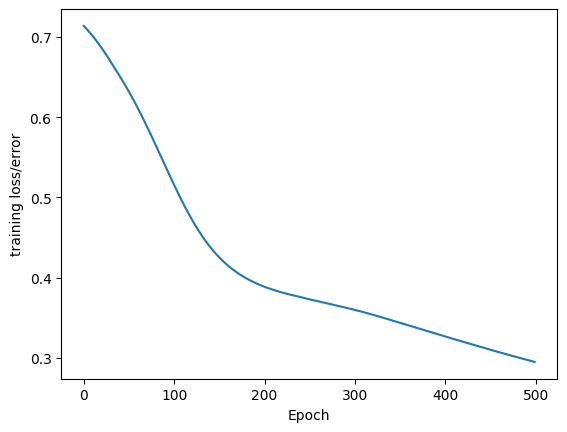

In [22]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("training loss/error")
plt.xlabel('Epoch')

In [23]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [24]:
loss

tensor(0.4132)

In [25]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "No stress"
    elif y_test[i] == 1:
      x = 'Stress'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-0.5831,  0.9680]) 	 1 	 1
2.)  tensor([ 2.1871, -1.9617]) 	 0 	 0
3.)  tensor([-0.2568,  0.7291]) 	 0 	 1
4.)  tensor([ 1.2936, -1.0163]) 	 0 	 0
5.)  tensor([ 1.0131, -0.7565]) 	 0 	 0
6.)  tensor([ 2.3617, -2.0785]) 	 0 	 0
7.)  tensor([-0.8818,  1.3244]) 	 1 	 1
8.)  tensor([-0.0344,  0.3680]) 	 0 	 1
9.)  tensor([-1.7702,  2.3704]) 	 1 	 1
10.)  tensor([ 1.7052, -1.3151]) 	 0 	 0
11.)  tensor([ 0.8621, -0.4818]) 	 1 	 0
12.)  tensor([ 0.4481, -0.0776]) 	 1 	 0
13.)  tensor([-0.7362,  1.2658]) 	 1 	 1
14.)  tensor([-0.6677,  1.1037]) 	 1 	 1
15.)  tensor([-1.3906,  1.9615]) 	 1 	 1
16.)  tensor([-1.4010,  1.9753]) 	 1 	 1
17.)  tensor([-0.1324,  0.4964]) 	 0 	 1
18.)  tensor([-1.6560,  2.2467]) 	 1 	 1
19.)  tensor([ 0.5908, -0.2389]) 	 1 	 0
20.)  tensor([-0.8559,  1.2700]) 	 1 	 1
21.)  tensor([-1.0573,  1.5196]) 	 1 	 1
22.)  tensor([ 1.1904, -0.9086]) 	 0 	 0
23.)  tensor([ 1.7320, -1.5319]) 	 0 	 0
24.)  tensor([-1.9993,  2.7300]) 	 1 	 1
25.)  tensor([-0.0331,  0

In [26]:
accuracy = correct / len(X_test) * 100
print('accuracy: ', accuracy)

accuracy:  81.17977528089888
